In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential, Model
from keras.optimizers import Adam, SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, BatchNormalization, Flatten, Dense, Dropout, SeparableConv2D

#Load Data and Exploration

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
# Concatenate training and test sets for analysis
x_all = np.concatenate((x_train, x_test), axis=0)
y_all = np.concatenate((y_train, y_test), axis=0)

#Data Distribution and Visualization

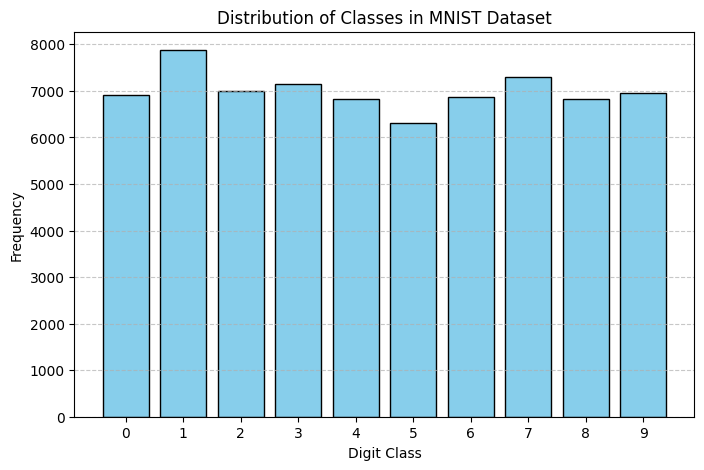

In [4]:
# Plot distribution of classes
plt.figure(figsize=(8, 5))
plt.hist(y_all, bins=np.arange(11)-0.5, rwidth=0.8, color='skyblue', edgecolor='black')
plt.xticks(np.arange(10))
plt.xlabel('Digit Class')
plt.ylabel('Frequency')
plt.title('Distribution of Classes in MNIST Dataset')
plt.savefig('data_distribution.png')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [5]:
# Display dataset properties
print("Total number of images:", len(x_all))
print("Image shape:", x_all[0].shape)
print("Number of unique classes:", len(np.unique(y_all)))

Total number of images: 70000
Image shape: (28, 28)
Number of unique classes: 10


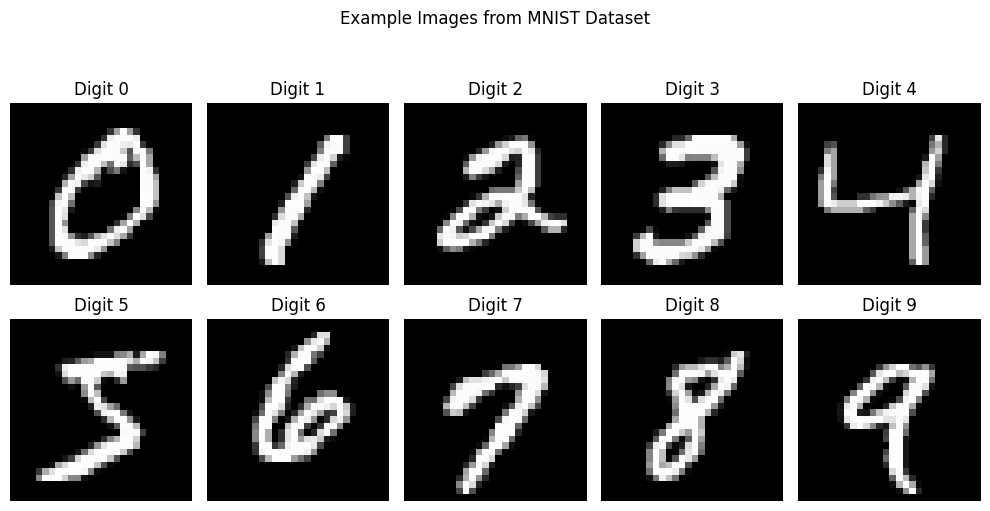

In [6]:
# Display example images
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_all[y_all == i][0], cmap='gray')
    plt.title(f'Digit {i}')
    plt.axis('off')
plt.suptitle('Example Images from MNIST Dataset', y=1.05)
plt.savefig('mnist_images.png')
plt.tight_layout()
plt.show()

##Data Standardization

In [7]:
# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Reshape and normalize images
X_train = X_train.reshape((-1, 28, 28, 1)) / 255.0
X_test = X_test.reshape((-1, 28, 28, 1)) / 255.0

In [8]:
print('Train images shape: ',X_train.shape)
print('Train labels shape: ',y_train.shape)
print('Test images shape: ',X_test.shape)
print('Test images shape: ',y_test.shape)

Train images shape:  (60000, 28, 28, 1)
Train labels shape:  (60000,)
Test images shape:  (10000, 28, 28, 1)
Test images shape:  (10000,)


In [9]:
print("Training data shape:", x_train.shape)
print("Test data shape:", x_test.shape)
print("Training labels shape:", y_train.shape)
print("Test labels shape:", y_test.shape)

Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)
Training labels shape: (60000,)
Test labels shape: (10000,)


##Adding Noise to Mnist Dataset

In [10]:
def add_noise_to_mnist(images, noise_level):
    """
    Add Gaussian noise with specified variance (noise_level) to the MNIST images.

    Parameters:
        images (numpy.ndarray): The MNIST images array.
        noise_level (float): The variance of the Gaussian noise to be added.

    Returns:
        numpy.ndarray: The MNIST images with added noise.
    """
    noisy_images = images + noise_level * np.random.randn(*images.shape)
    noisy_images = np.clip(noisy_images, 0., 1.)
    return noisy_images

##Convolutional Neural Network

In [11]:
# Define noise levels
noise_levels = [0.05, 0.1, 0.175, 0.25, 0.3, 0.5, 0.62, 0.75]

# List to store CNN models for different noise levels
cnn_models = []

# Define callbacks for early stopping
early_stopping = EarlyStopping(patience=3, restore_best_weights=True)

for noise_level in noise_levels:
    print(f"Training CNN model for noise level: {noise_level}")
    # Add noise to the training data
    X_train_noise = add_noise_to_mnist(X_train, noise_level)

    # Split the noisy data into train and validation sets
    X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train_noise, y_train, test_size=0.2, random_state=42)

    # Create CNN model
    cnn_model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        Flatten(),
        Dense(64, activation='relu'),
        Dense(10, activation='softmax')
    ])

    # Compile the model
    cnn_model.compile(optimizer='adam',
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])

    # Train the model with early stopping
    history = cnn_model.fit(X_train_split, y_train_split, epochs=20, validation_data=(X_val_split, y_val_split), callbacks=[early_stopping])

    # Add the model to the list
    cnn_models.append(cnn_model)

Training CNN model for noise level: 0.05
Epoch 1/20
1500/1500 [==============================] - 35s 22ms/step - loss: 0.1753 - accuracy: 0.9444 - val_loss: 0.0733 - val_accuracy: 0.9782
Epoch 2/20
1500/1500 [==============================] - 27s 18ms/step - loss: 0.0525 - accuracy: 0.9839 - val_loss: 0.0455 - val_accuracy: 0.9868
Epoch 3/20
1500/1500 [==============================] - 27s 18ms/step - loss: 0.0380 - accuracy: 0.9880 - val_loss: 0.0441 - val_accuracy: 0.9862
Epoch 4/20
1500/1500 [==============================] - 28s 18ms/step - loss: 0.0287 - accuracy: 0.9911 - val_loss: 0.0447 - val_accuracy: 0.9868
Epoch 5/20
1500/1500 [==============================] - 27s 18ms/step - loss: 0.0225 - accuracy: 0.9926 - val_loss: 0.0364 - val_accuracy: 0.9893
Epoch 6/20
1500/1500 [==============================] - 27s 18ms/step - loss: 0.0172 - accuracy: 0.9944 - val_loss: 0.0429 - val_accuracy: 0.9881
Epoch 7/20
1500/1500 [==============================] - 27s 18ms/step - loss: 0.015

###Evaluation

In [12]:
# Evaluate the models on test data
test_results = []
for cnn_model in cnn_models:
    loss, accuracy = cnn_model.evaluate(X_test, y_test)
    test_results.append({'loss': loss, 'accuracy': accuracy})

313/313 [==============================] - 2s 6ms/step - loss: 0.0880 - accuracy: 0.9733


In [13]:
# Print results
print("Results:")
for noise_level, result in zip(noise_levels, test_results):
    print(f"Noise Level: {noise_level}, Loss: {result['loss']}, Accuracy: {result['accuracy']}")

Results:
Noise Level: 0.05, Loss: 0.027295364066958427, Accuracy: 0.9922000169754028
Noise Level: 0.1, Loss: 0.03375857323408127, Accuracy: 0.991100013256073
Noise Level: 0.175, Loss: 0.02641914039850235, Accuracy: 0.9912999868392944
Noise Level: 0.25, Loss: 0.02808842808008194, Accuracy: 0.9904000163078308
Noise Level: 0.3, Loss: 0.036402780562639236, Accuracy: 0.9905999898910522
Noise Level: 0.5, Loss: 0.05637410283088684, Accuracy: 0.9832000136375427
Noise Level: 0.62, Loss: 0.06998384743928909, Accuracy: 0.9811000227928162
Noise Level: 0.75, Loss: 0.08796357363462448, Accuracy: 0.9732999801635742


313/313 [==============================] - 2s 6ms/step
Metrics for noise level 0.05:
Accuracy: 0.9922
Precision: 0.9922088536645031
Recall: 0.9922
F1 Score: 0.9922002341380896



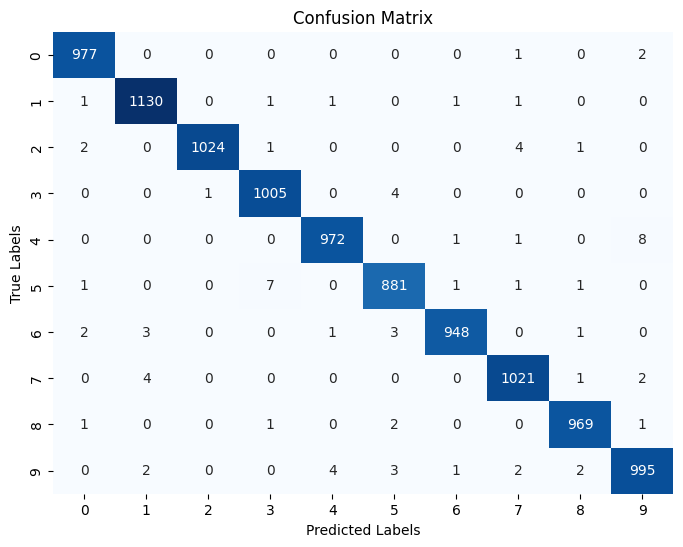

313/313 [==============================] - 2s 6ms/step
Metrics for noise level 0.1:
Accuracy: 0.9911
Precision: 0.9911821775270071
Recall: 0.9911
F1 Score: 0.9911066533006797



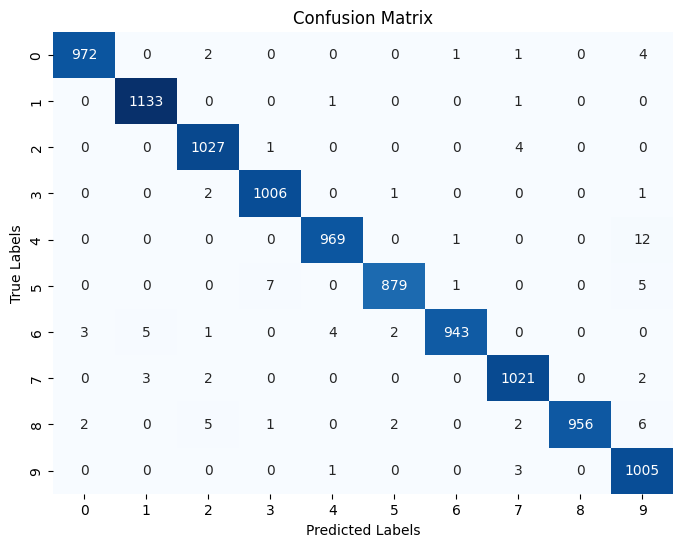

313/313 [==============================] - 2s 7ms/step
Metrics for noise level 0.175:
Accuracy: 0.9913
Precision: 0.9913133323144302
Recall: 0.9913
F1 Score: 0.9912986378432793



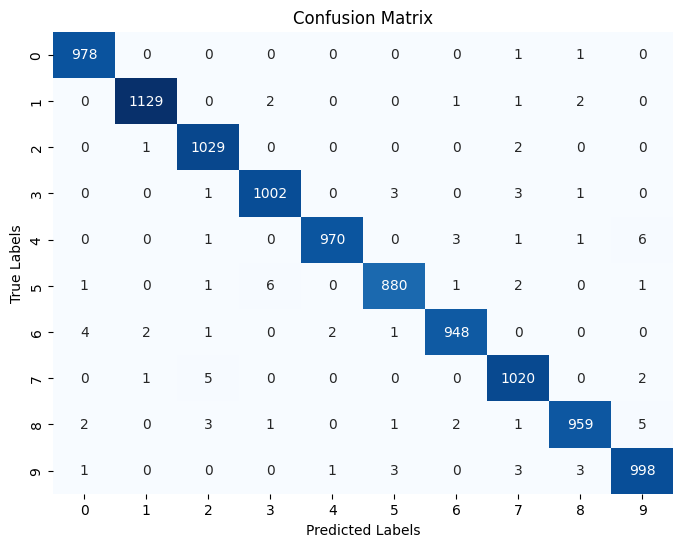

313/313 [==============================] - 2s 6ms/step
Metrics for noise level 0.25:
Accuracy: 0.9904
Precision: 0.9904181835661455
Recall: 0.9904
F1 Score: 0.9903978405141978



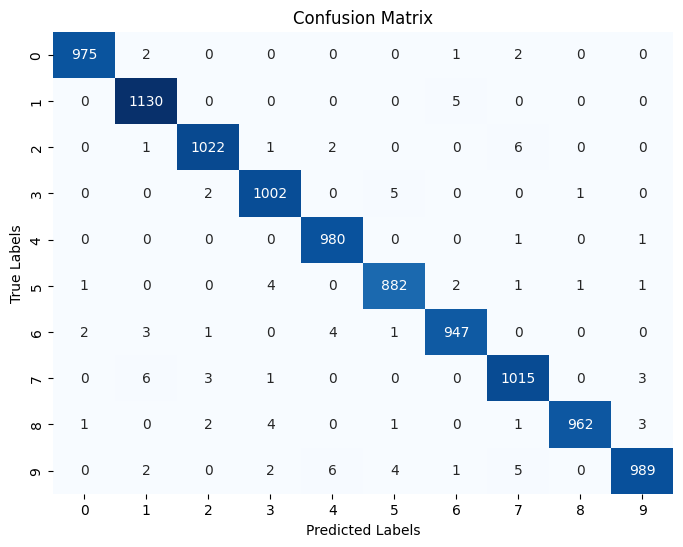

313/313 [==============================] - 2s 6ms/step
Metrics for noise level 0.3:
Accuracy: 0.9906
Precision: 0.9906656630913614
Recall: 0.9906
F1 Score: 0.9906017976406285



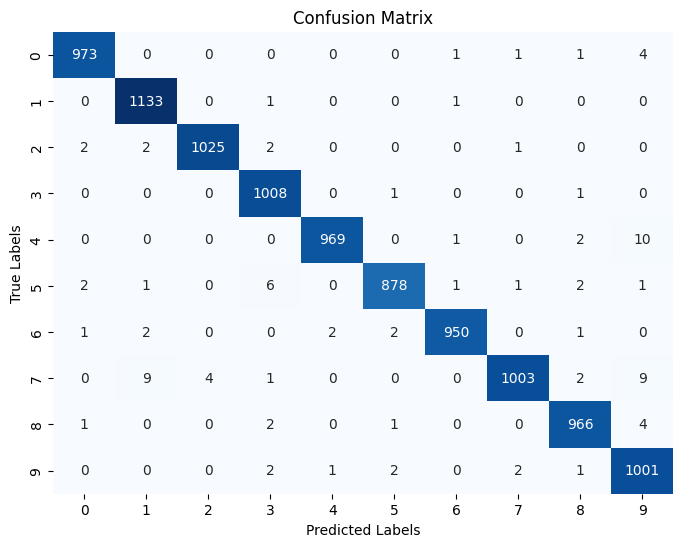

313/313 [==============================] - 2s 6ms/step
Metrics for noise level 0.5:
Accuracy: 0.9832
Precision: 0.9833498565196042
Recall: 0.9832
F1 Score: 0.9832096853396508



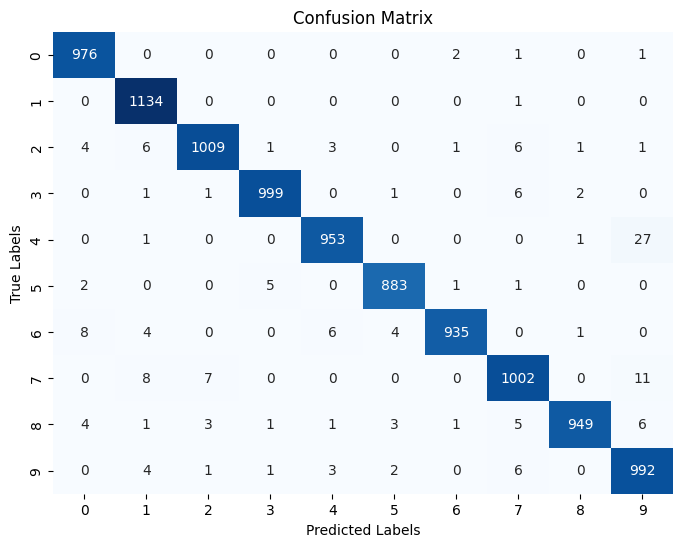

313/313 [==============================] - 2s 6ms/step
Metrics for noise level 0.62:
Accuracy: 0.9811
Precision: 0.9812460626888886
Recall: 0.9811
F1 Score: 0.981112924781461



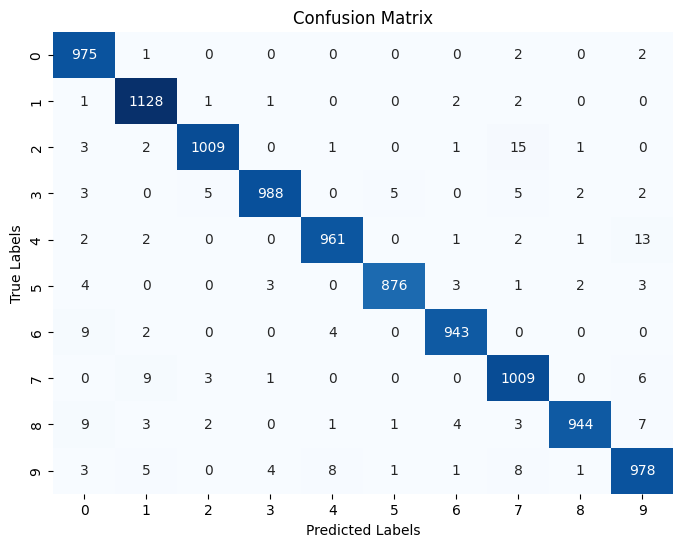

313/313 [==============================] - 2s 5ms/step
Metrics for noise level 0.75:
Accuracy: 0.9733
Precision: 0.9734989502954814
Recall: 0.9733
F1 Score: 0.973285601025688



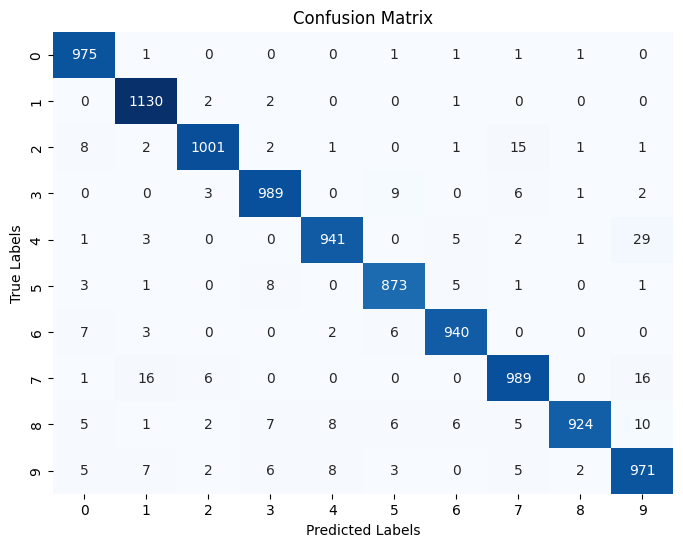

In [14]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import seaborn as sns

# Assume X_test, y_test are defined and preprocessed appropriately

# Lists to store metrics for each noise level
accuracies = []
confusion_matrices = []
precisions = []
recalls = []
f1_scores = []

# Evaluate each model
for noise_level, model in zip(noise_levels, cnn_models):
    # Predict labels for the test dataset
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred_classes)
    accuracies.append(accuracy)

    cm = confusion_matrix(y_test, y_pred_classes)
    confusion_matrices.append(cm)

    precision = precision_score(y_test, y_pred_classes, average = 'weighted')
    precisions.append(precision)

    recall = recall_score(y_test, y_pred_classes, average = 'weighted')
    recalls.append(recall)

    f1 = f1_score(y_test, y_pred_classes, average = 'weighted')
    f1_scores.append(f1)

    # Print results for each noise level
    print(f"Metrics for noise level {noise_level}:")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}\n")
    # Plot the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()



###Plotting the Test Loss and Accuracy

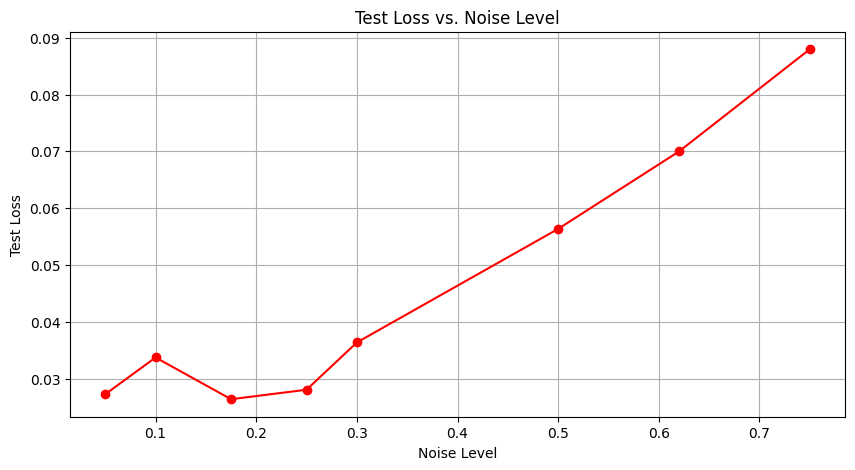

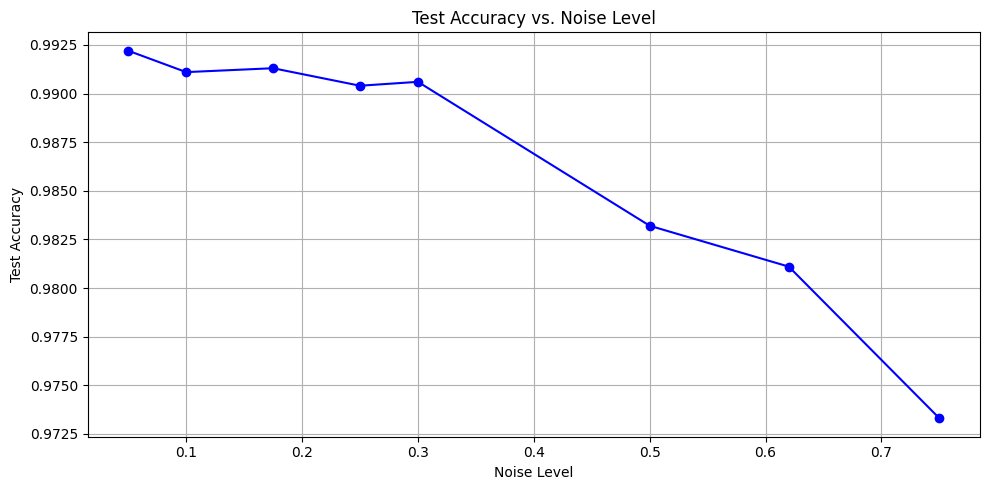

In [15]:
cnn_test_losses = []
cnn_test_accuracies = []

for result in test_results:
    cnn_test_losses.append(result['loss'])
    cnn_test_accuracies.append(result['accuracy'])

# Plot test loss and accuracy vs. noise level
plt.figure(figsize=(10, 5))
plt.plot(noise_levels, cnn_test_losses, marker='o', color = 'r')
plt.title('Test Loss vs. Noise Level')
plt.xlabel('Noise Level')
plt.ylabel('Test Loss')
plt.grid(True)


plt.figure(figsize=(10, 5))
plt.plot(noise_levels, cnn_test_accuracies, marker='o', color = 'b')
plt.title('Test Accuracy vs. Noise Level')
plt.xlabel('Noise Level')
plt.ylabel('Test Accuracy')
plt.grid(True)


plt.tight_layout()
plt.show()

##Denoising AutoEncoder

In [16]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

train_images_flat = x_train.reshape((len(x_train), 28*28))
test_images_flat = x_test.reshape((len(x_test), 28*28))

In [17]:
def denoising_autoencoder():
    input_layer = Input(shape=(28*28,))
    encoded = Dense(128, activation='relu')(input_layer)
    decoded = Dense(28*28, activation='sigmoid')(encoded)

    autoencoder = Model(input_layer, decoded)
    autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy')
    return autoencoder

In [18]:
dae_models = []
histories = []

def add_noise(images, noise_factor=0.5):
    noisy_images = images + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=images.shape)
    noisy_images = np.clip(noisy_images, 0., 1.)
    return noisy_images

for noise_level in noise_levels:
    print(f"Training denoising autoencoder for noise level: {noise_level}")
    noisy_train_images = add_noise(train_images_flat, noise_factor=noise_level)

    autoencoder = denoising_autoencoder()

    history = autoencoder.fit(noisy_train_images, train_images_flat,
                              epochs=20, batch_size=256, validation_split=0.1, callbacks=[early_stopping])

    dae_models.append(autoencoder)
    histories.append(history)

Training denoising autoencoder for noise level: 0.05
Epoch 1/20
211/211 [==============================] - 2s 9ms/step - loss: 0.2205 - val_loss: 0.1385
Epoch 2/20
211/211 [==============================] - 2s 8ms/step - loss: 0.1180 - val_loss: 0.1037
Epoch 3/20
211/211 [==============================] - 2s 11ms/step - loss: 0.0962 - val_loss: 0.0910
Epoch 4/20
211/211 [==============================] - 2s 9ms/step - loss: 0.0869 - val_loss: 0.0843
Epoch 5/20
211/211 [==============================] - 2s 8ms/step - loss: 0.0819 - val_loss: 0.0806
Epoch 6/20
211/211 [==============================] - 2s 9ms/step - loss: 0.0786 - val_loss: 0.0779
Epoch 7/20
211/211 [==============================] - 2s 9ms/step - loss: 0.0763 - val_loss: 0.0761
Epoch 8/20
211/211 [==============================] - 2s 9ms/step - loss: 0.0747 - val_loss: 0.0746
Epoch 9/20
211/211 [==============================] - 2s 11ms/step - loss: 0.0733 - val_loss: 0.0734
Epoch 10/20
211/211 [========================

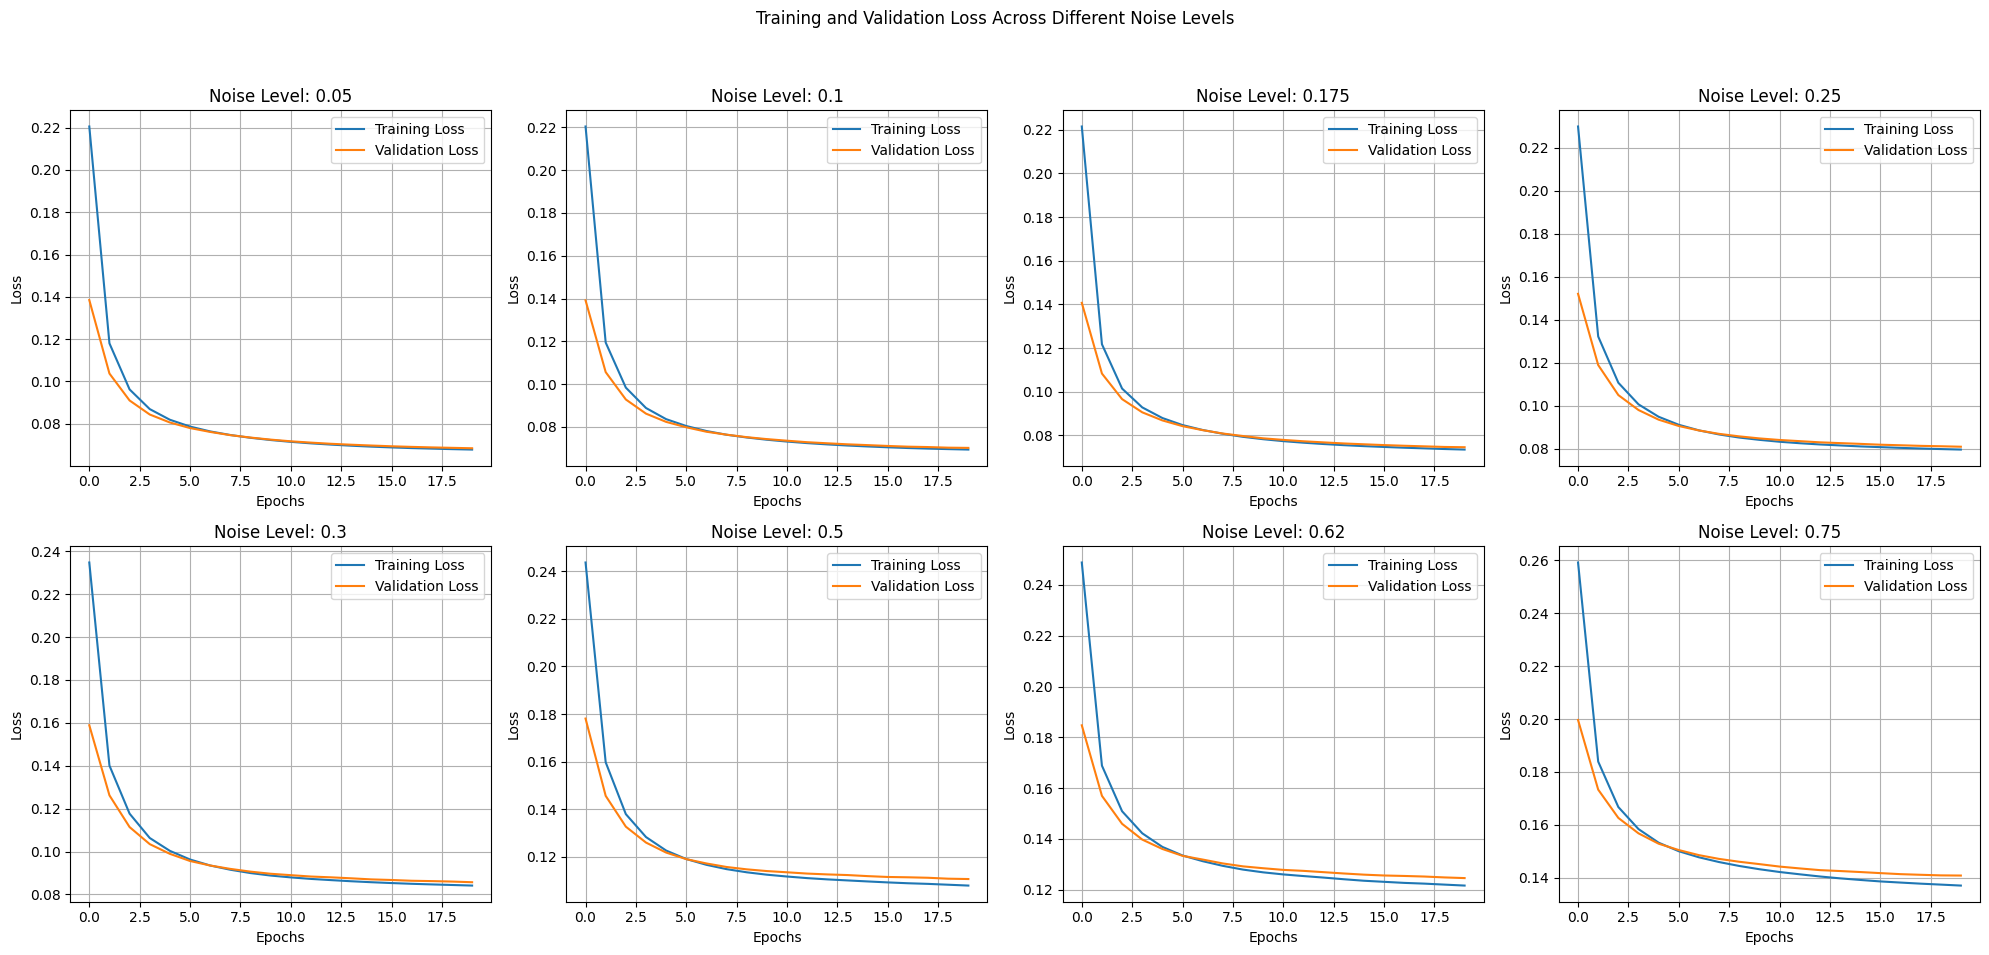

In [19]:
# Number of plots, and setting up subplots grid
num_plots = len(histories)
cols = 4  # Maximum of 4 columns per row
rows = (num_plots + cols - 1) // cols  # Calculate rows needed

fig, axes = plt.subplots(rows, cols, figsize=(20, 5 * rows))  # Adjust size as needed
fig.suptitle('Training and Validation Loss Across Different Noise Levels')

# Iterate through all histories and plot them
for i, history in enumerate(histories):
    ax = axes[i // cols, i % cols] if rows > 1 else axes[i % cols]  # Adjust indexing based on rows
    ax.plot(history.history['loss'], label='Training Loss')
    ax.plot(history.history['val_loss'], label='Validation Loss')
    ax.set_title(f'Noise Level: {noise_levels[i]}')
    ax.set_xlabel('Epochs')
    ax.set_ylabel('Loss')
    ax.legend()
    ax.grid(True)

# If there are any empty subplots, turn them off
for i in range(num_plots, rows * cols):
    axes[i // cols, i % cols].axis('off') if rows > 1 else axes[i % cols].axis('off')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


###Image Reconstruction

313/313 [==============================] - 0s 1ms/step


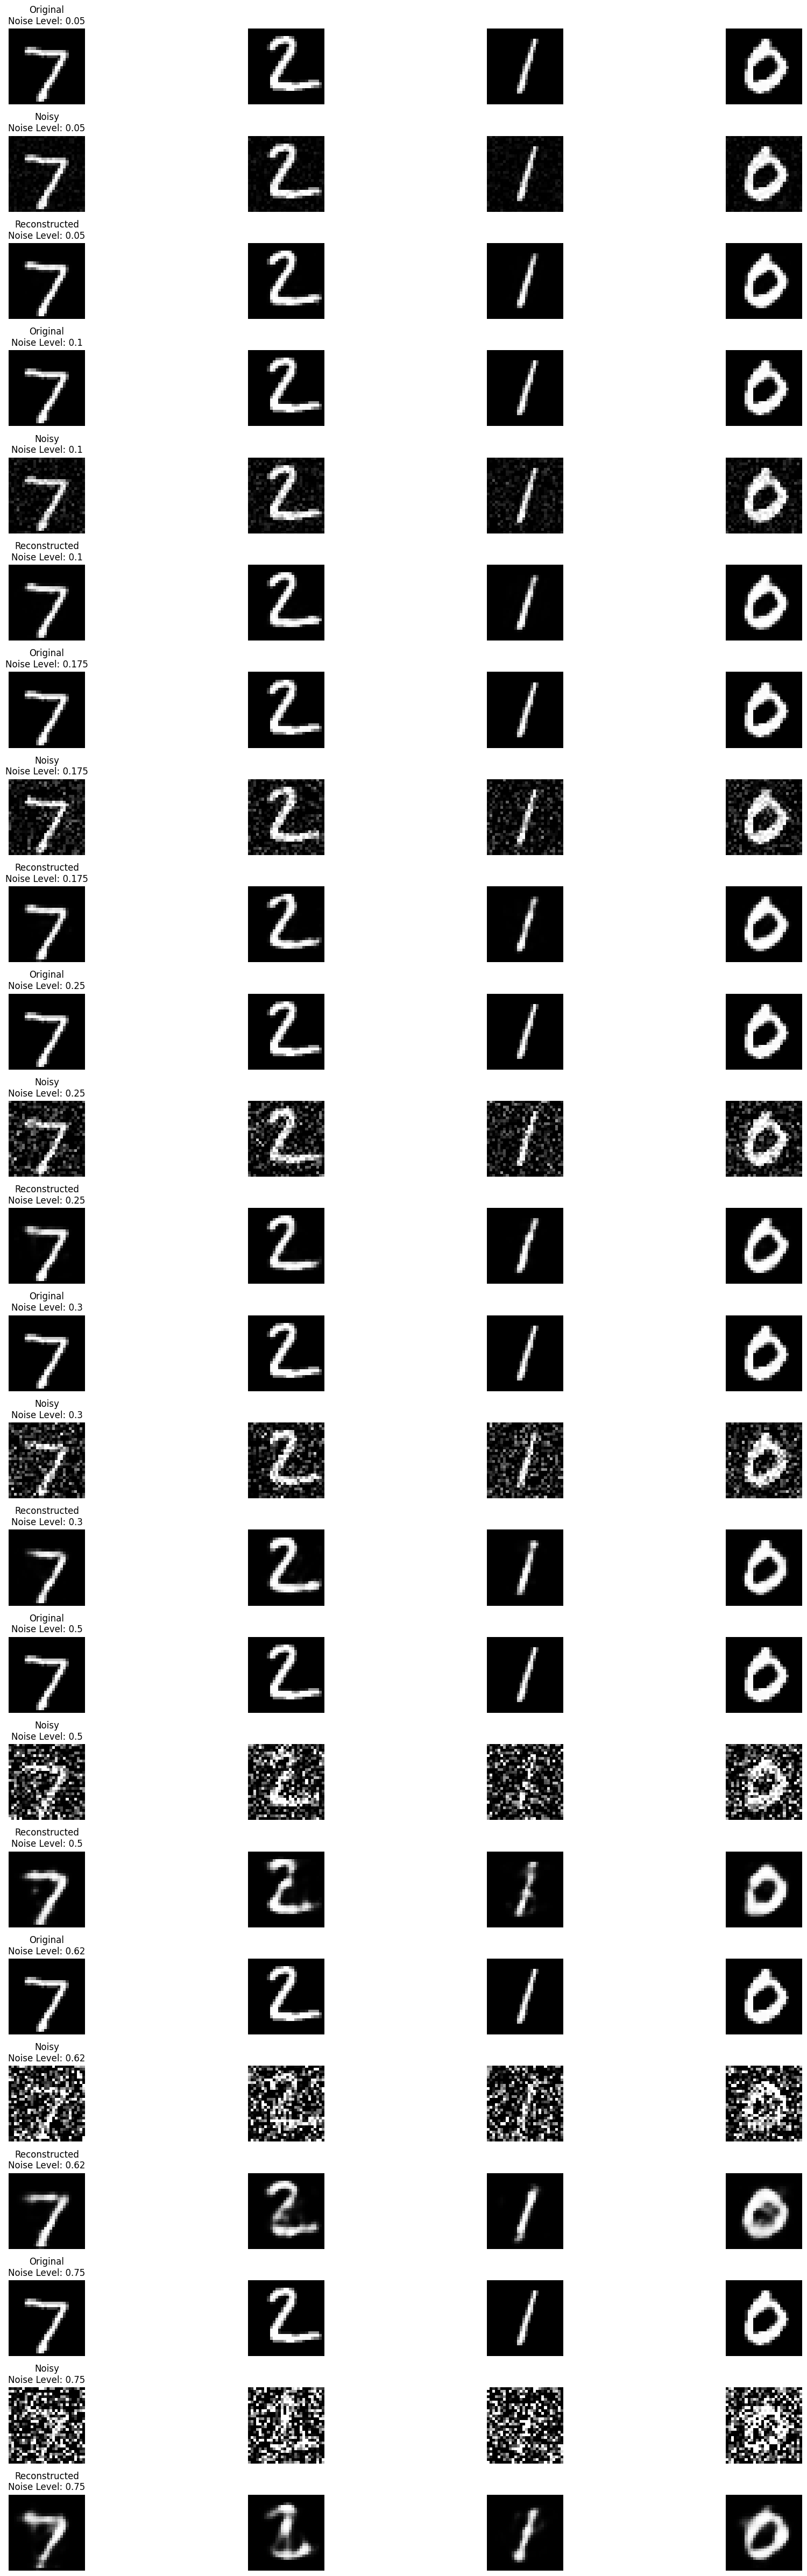

In [20]:
def display_comparison(models, noise_levels, test_images, n_images=10):
    num_levels = len(models)
    plt.figure(figsize=(20, 6 * num_levels))  # Adjust size to accommodate titles and more rows

    for idx, (model, noise_level) in enumerate(zip(models, noise_levels)):
        # Add noise to the test data
        noisy_images = add_noise(test_images.reshape(-1, 28, 28), noise_level)  # Ensure input is in 28x28 format for noise addition
        # Flatten the noisy images for prediction
        noisy_images_flat = noisy_images.reshape(noisy_images.shape[0], -1)
        # Predict the reconstructed images from the noisy data
        reconstructed_images = model.predict(noisy_images_flat)

        for i in range(n_images):
            # Original Image
            ax = plt.subplot(num_levels * 3, n_images, i + 1 + (idx * 3 * n_images))
            plt.imshow(test_images[i].reshape(28, 28), cmap='gray')  # Reshape flat images to 28x28 for display
            if i == 0:
                plt.title(f"Original\nNoise Level: {noise_level}")
            plt.axis('off')

            # Noisy Image
            ax = plt.subplot(num_levels * 3, n_images, i + 1 + n_images + (idx * 3 * n_images))
            plt.imshow(noisy_images[i].reshape(28, 28), cmap='gray')  # Reshape flat noisy images to 28x28 for display
            if i == 0:
                plt.title(f"Noisy\nNoise Level: {noise_level}")
            plt.axis('off')

            # Reconstructed Image
            ax = plt.subplot(num_levels * 3, n_images, i + 1 + 2 * n_images + (idx * 3 * n_images))
            plt.imshow(reconstructed_images[i].reshape(28, 28), cmap='gray')  # Reshape flat predictions to 28x28 for display
            if i == 0:
                plt.title(f"Reconstructed\nNoise Level: {noise_level}")
            plt.axis('off')

    plt.tight_layout()
    plt.show()

# Example call (ensure to replace `dae_models`, `noise_levels`, `test_images_flat` with your actual variables)
display_comparison(dae_models, noise_levels, test_images_flat, n_images= 4)


###Evaluation

In [21]:
from keras.losses import MeanSquaredError

# Function to calculate MSE
def calculate_mse(original, reconstructed):
    mse = MeanSquaredError()
    return mse(original, reconstructed).numpy()

reconstruction_errors = []

for i, noise_level in enumerate(noise_levels):
    print(f"Calculating reconstruction error for noise level: {noise_level}")
    # Add noise to original test images
    noisy_test_images = add_noise(test_images_flat, noise_factor=noise_level)

    # Use the DAE to reconstruct images from the noisy dataset
    reconstructed_images = dae_models[i].predict(noisy_test_images)

    # Calculate MSE between original and reconstructed images
    error = calculate_mse(test_images_flat, reconstructed_images)
    reconstruction_errors.append(error)
    print(f"Reconstruction MSE at noise level {noise_level}: {error:.4f}")

Calculating reconstruction error for noise level: 0.05
313/313 [==============================] - 0s 1ms/step
Reconstruction MSE at noise level 0.05: 0.0021
Calculating reconstruction error for noise level: 0.1
313/313 [==============================] - 0s 1ms/step
Reconstruction MSE at noise level 0.1: 0.0026
Calculating reconstruction error for noise level: 0.175
313/313 [==============================] - 0s 1ms/step
Reconstruction MSE at noise level 0.175: 0.0038
Calculating reconstruction error for noise level: 0.25
313/313 [==============================] - 0s 1ms/step
Reconstruction MSE at noise level 0.25: 0.0057
Calculating reconstruction error for noise level: 0.3
313/313 [==============================] - 0s 1ms/step
Reconstruction MSE at noise level 0.3: 0.0072
Calculating reconstruction error for noise level: 0.5
313/313 [==============================] - 1s 2ms/step
Reconstruction MSE at noise level 0.5: 0.0148
Calculating reconstruction error for noise level: 0.62
313/313

##AutoEncoder Classifier

In [22]:
def build_classifier(encoded_dim):
    inputs = Input(shape=(encoded_dim,))
    x = Dense(64, activation='relu')(inputs)
    outputs = Dense(10, activation='softmax')(x)
    classifier_model = Model(inputs=inputs, outputs=outputs)
    classifier_model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
    return classifier_model

In [23]:

classifier_histories = []  # List to store histories for each noise level
classifier_test_losses = []
classifier_test_accuracies = []

for i, noise_level in enumerate(noise_levels):
    print(f"Building and training classifier for noise level: {noise_level}")
    autoencoder = dae_models[i]
    encoder = Model(inputs=autoencoder.input, outputs=autoencoder.layers[1].output)

    noisy_train_images = add_noise(train_images_flat, noise_factor=noise_level)
    noisy_test_images = add_noise(test_images_flat, noise_factor=noise_level)

    encoded_train = encoder.predict(noisy_train_images)
    encoded_test = encoder.predict(noisy_test_images)

    classifier = build_classifier(encoded_train.shape[1])
    history = classifier.fit(encoded_train, y_train, epochs=10, batch_size=32)
    classifier_histories.append(history)

    classifier_test_loss, classifier_test_accuracy = classifier.evaluate(encoded_test, y_test, verbose=0)
    print(f"Test accuracy for noise level {noise_level}: {classifier_test_accuracy}")
    classifier_test_losses.append(classifier_test_loss)
    classifier_test_accuracies.append(classifier_test_accuracy)

Building and training classifier for noise level: 0.05
313/313 [==============================] - 0s 1ms/step
Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5501 - accuracy: 0.8335
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2883 - accuracy: 0.9161
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2370 - accuracy: 0.9306
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2036 - accuracy: 0.9408
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1804 - accuracy: 0.9461
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1632 - accuracy: 0.9523
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1513 - accuracy: 0.9555
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1394 - accuracy: 0.9580
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss

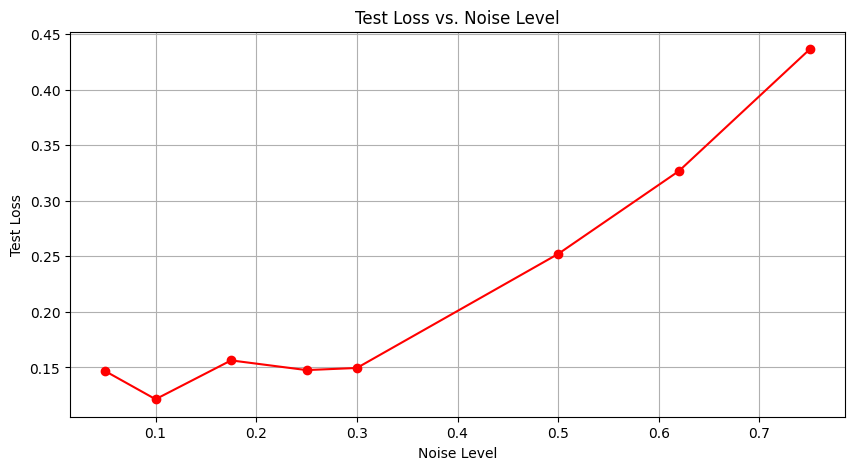

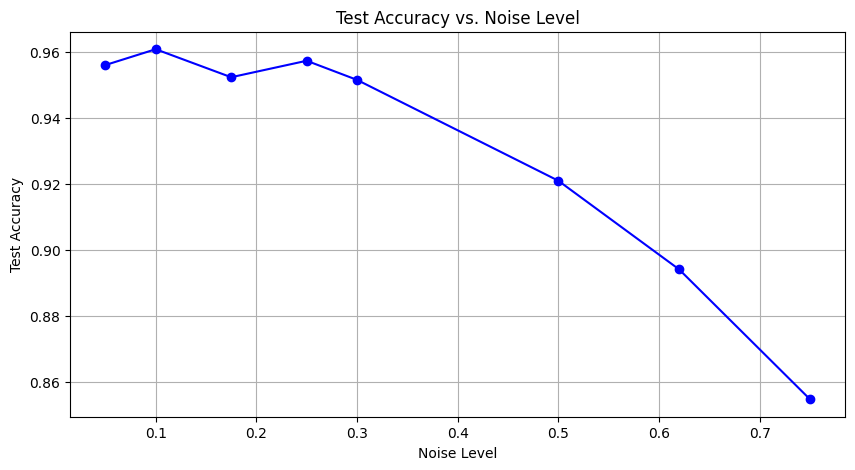

In [24]:
# Plotting test losses
plt.figure(figsize=(10, 5))
plt.plot(noise_levels, classifier_test_losses, marker='o', linestyle='-', color='r')
plt.title('Test Loss vs. Noise Level')
plt.xlabel('Noise Level')
plt.ylabel('Test Loss')
plt.grid(True)

# Plotting test accuracies
plt.figure(figsize=(10, 5))
plt.plot(noise_levels, classifier_test_accuracies, marker='o', linestyle='-', color='b')
plt.title('Test Accuracy vs. Noise Level')
plt.xlabel('Noise Level')
plt.ylabel('Test Accuracy')
plt.grid(True)

plt.show()